# K-Nearest Neighbors(KNN) - 

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms.
simple example. Suppose you have a dataset with two variables, which when plotted, looks like the one in the following figure.

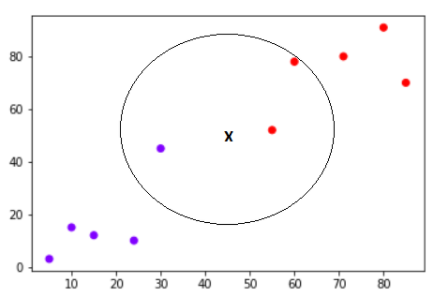

Your task is to classify a new data point with 'X' into "Blue" class or "Red" class. The coordinate values of the data point are x=45 and y=50. Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X from all the points. It then finds the 3 nearest points with least distance to point X. This is shown in the figure below. The three nearest points have been encircled.

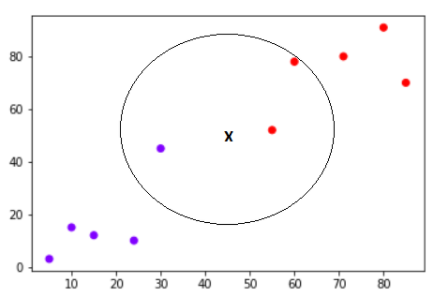

The final step of the KNN algorithm is to assign new point to the class to which majority of the three nearest points belong. From the figure above we can see that the two of the three nearest points belong to the class "Red" while one belongs to the class "Blue". Therefore the new data point will be classified as "Red".

Importing Libraries  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the Dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
dataframe = pd.DataFrame(iris.data,columns=iris.feature_names)
dataframe['Class'] = iris.target
dataframe.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0


In [3]:
dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Preprocessing :  

In [4]:
X = dataframe.iloc[:, :-1].values

y = dataframe.iloc[:, 4].values

Train Test Split:

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Feature Scaling:

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Training and Predictions :

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier_model = KNeighborsClassifier(n_neighbors=5)
classifier_model.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_pred = classifier_model.predict(X_test)
y_pred[:5]

array([0, 2, 0, 0, 2])

Evaluating the Algorithm :

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0  9  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Comparing Error Rate with the K Value:

In [10]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

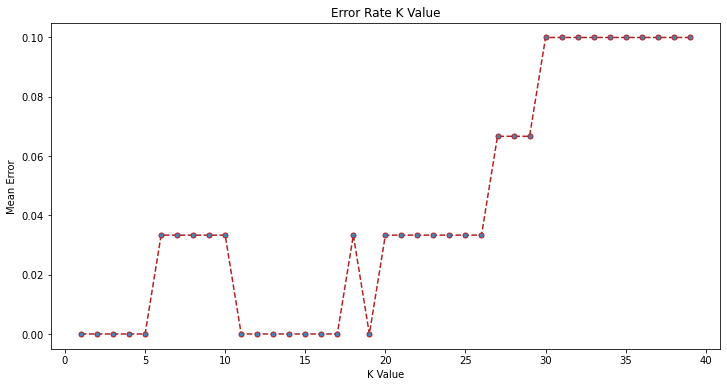

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='firebrick', linestyle='dashed', marker='.',
         markerfacecolor='steelblue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')